In [254]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from plotnine import *
from sklearn.model_selection import train_test_split



In [255]:
DF = pd.read_csv("iris-1.csv")
DF.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


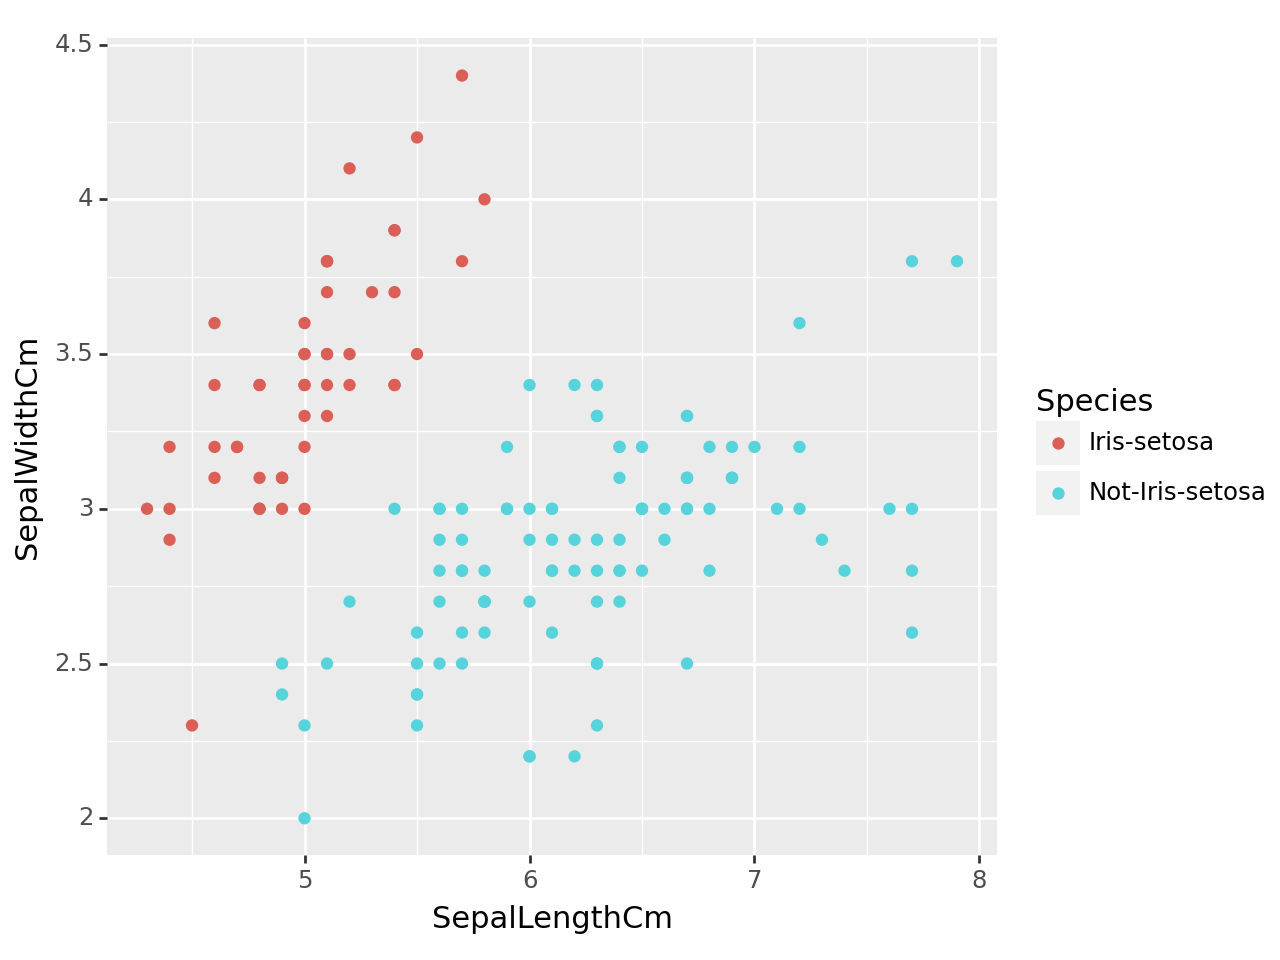

<Figure Size: (640 x 480)>

In [256]:
plot1 = ggplot(DF, aes(x='SepalLengthCm', y='SepalWidthCm', color='Species')) + geom_point()
plot1

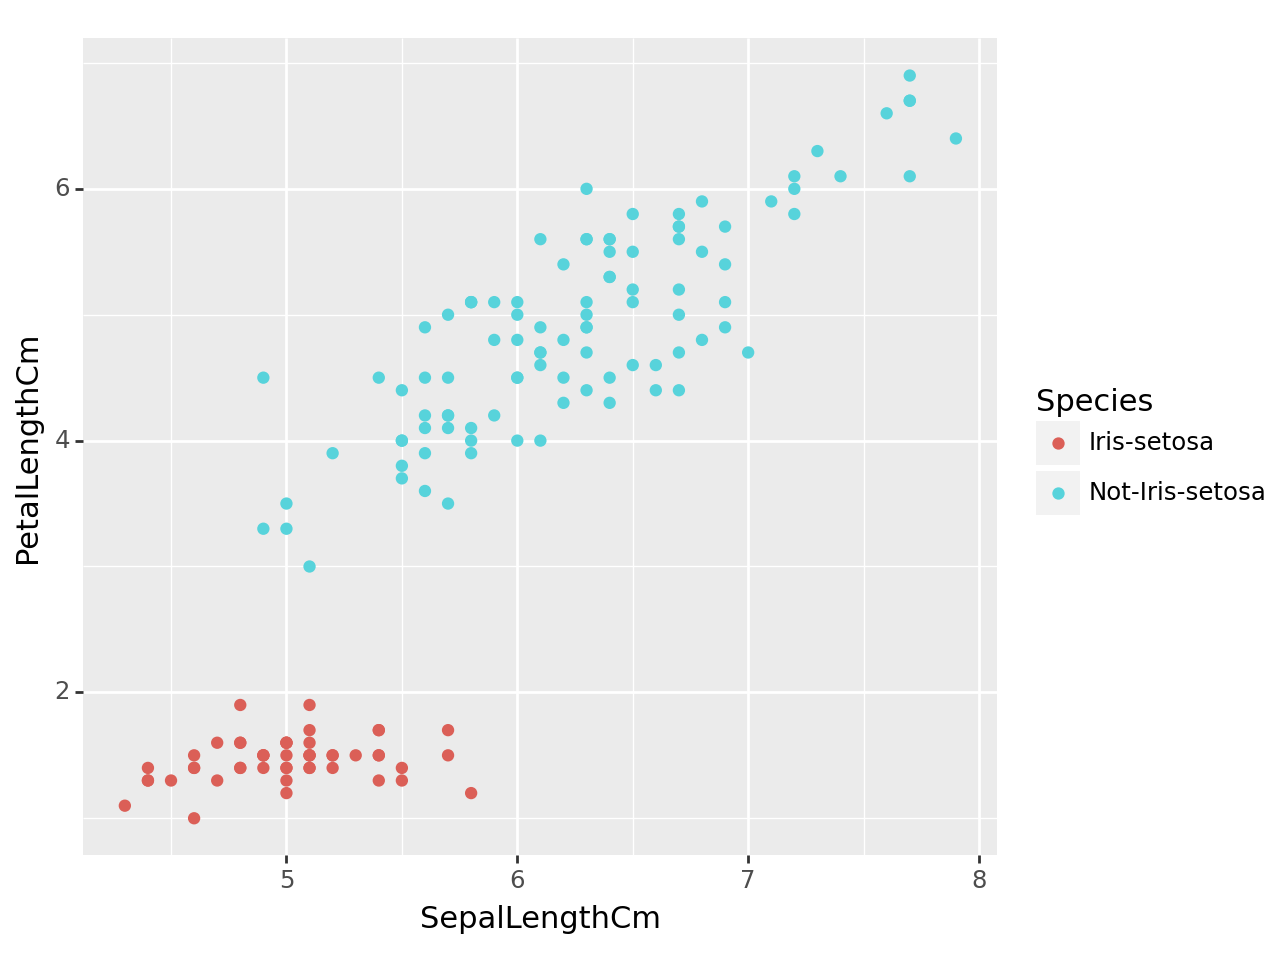

<Figure Size: (640 x 480)>

In [257]:
plot2 = ggplot(DF, aes(x='SepalLengthCm', y='PetalLengthCm', color='Species')) + geom_point()
plot2

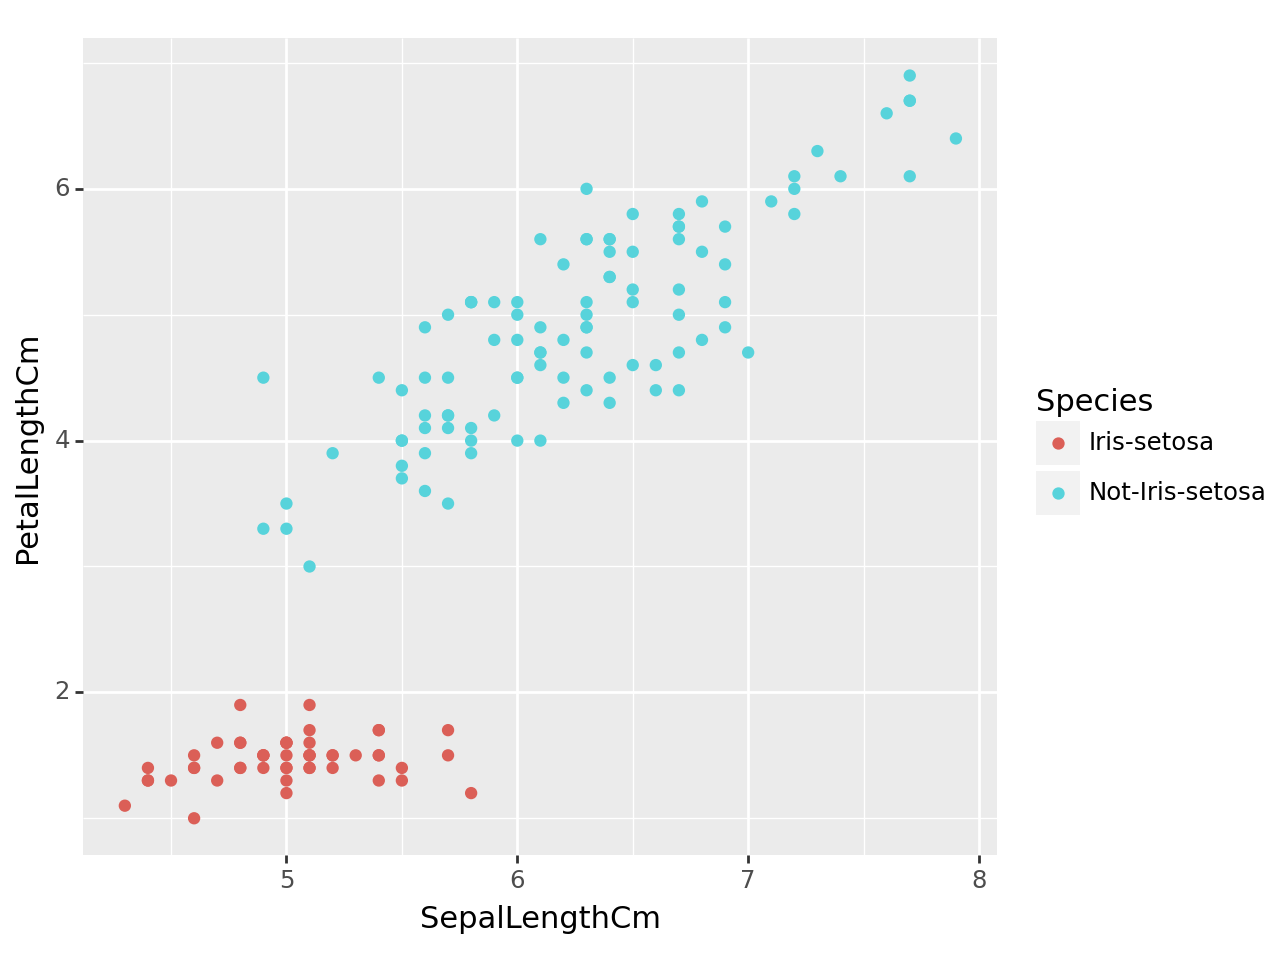

<Figure Size: (640 x 480)>

In [258]:
plot3 = ggplot(DF, aes(x='SepalLengthCm', y='PetalLengthCm', color='Species')) + geom_point()
plot3

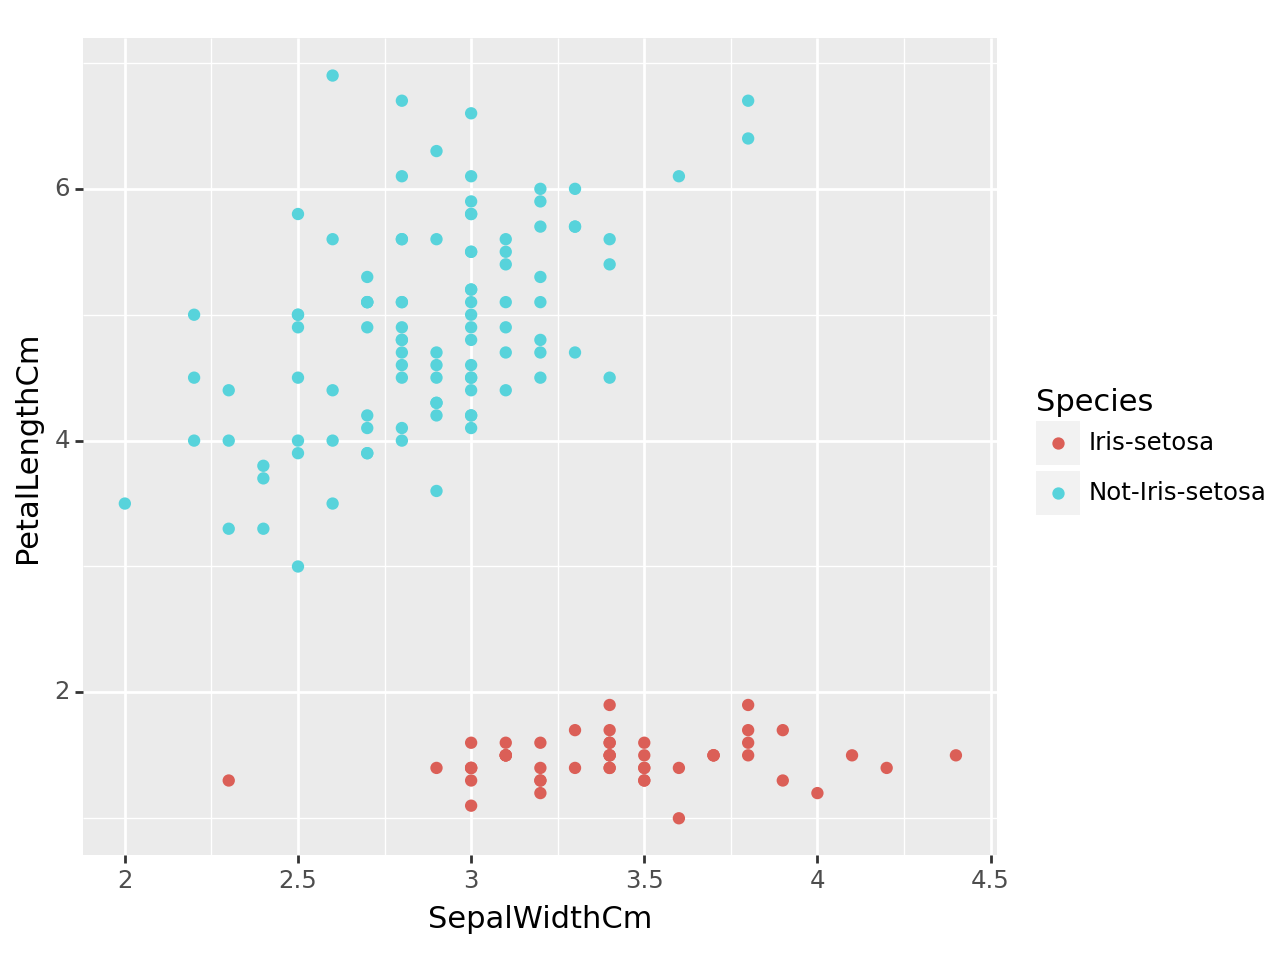

<Figure Size: (640 x 480)>

In [259]:
plot4 = ggplot(DF, aes(x='SepalWidthCm', y='PetalLengthCm', color='Species')) + geom_point()
plot4

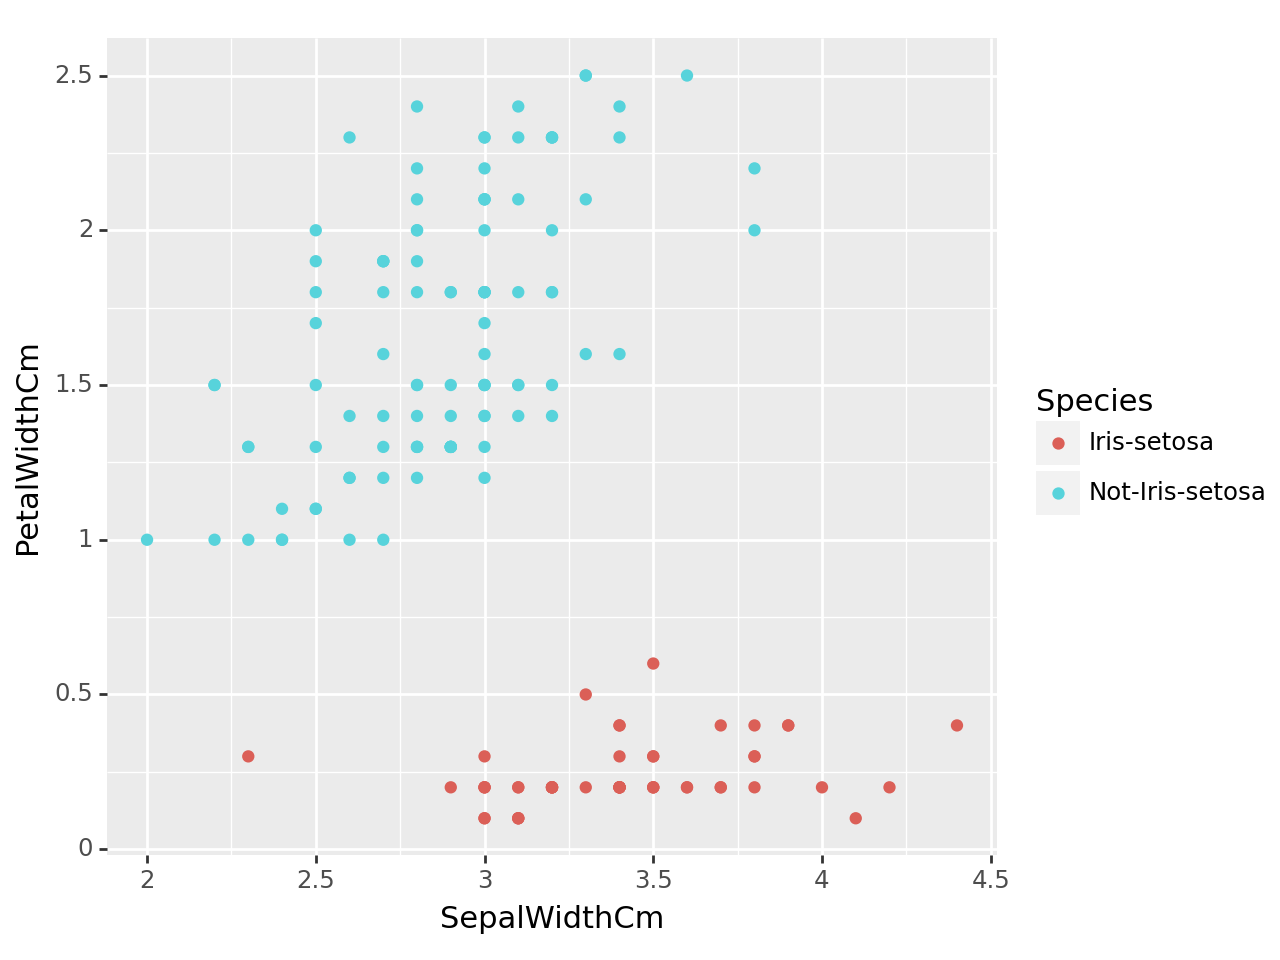

<Figure Size: (640 x 480)>

In [260]:
plot5 = ggplot(DF, aes(x='SepalWidthCm', y='PetalWidthCm', color='Species')) + geom_point()
plot5

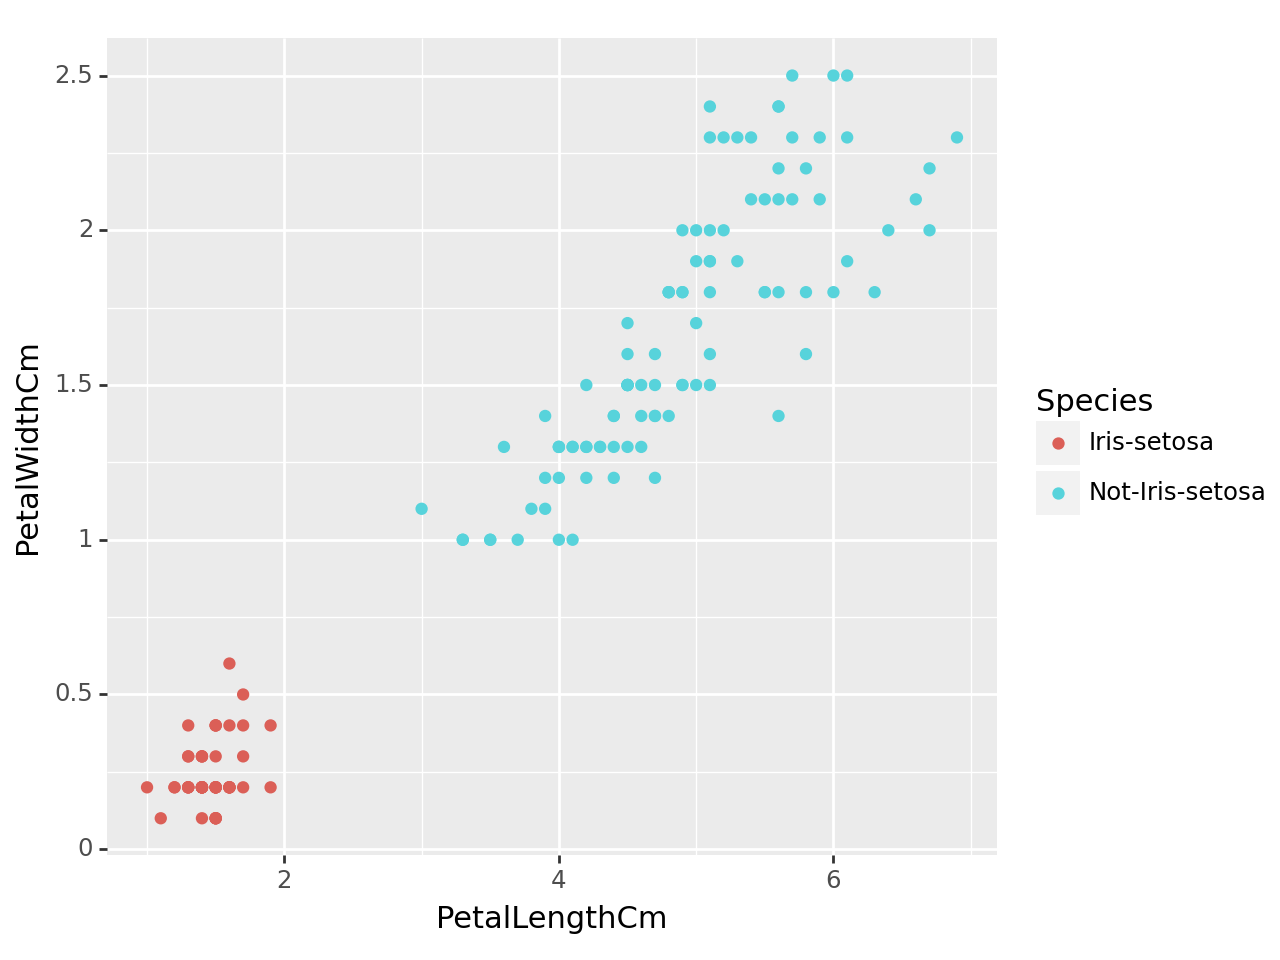

<Figure Size: (640 x 480)>

In [261]:
plot5 = ggplot(DF, aes(x='PetalLengthCm', y='PetalWidthCm', color='Species')) + geom_point()
plot5

In [262]:
Vars = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]
DF_Vars = DF[Vars]



In [322]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

X = DF[Vars]
y = np.where(DF['Species'] == 'Iris-setosa', 1, 0)


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                   test_size=0.2, stratify=y,
                                   random_state=11)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svc_model = SVC(kernel='linear', random_state=11)
svc_model.fit(X_train, y_train)


coefficients = svc_model.coef_
bias = svc_model.intercept_





In [301]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error

y_train_pred = svc_model.predict(X_train)
y_test_pred = svc_model.predict(X_test)
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
train_MAE = mean_absolute_error(y_train, y_train_pred)
test_MAE = mean_absolute_error(y_test, y_test_pred)
train_MSE = mean_squared_error(y_train, y_train_pred)
test_MSE = mean_squared_error(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)
print("Train Precision:", train_precision)
print("Test Precision:", test_precision)
print("Train Recall:", train_recall)
print("Test Recall:", test_recall)
print("Train F1-Score:", train_f1)
print("Test F1-Score:", test_f1)
print("Train MAE:", train_MAE)
print("Test MAE:", test_MAE)
print("Train MSE:", train_MSE)
print("Test MSE:", test_MSE)


Train Accuracy: 1.0
Test Accuracy: 1.0
Train Precision: 1.0
Test Precision: 1.0
Train Recall: 1.0
Test Recall: 1.0
Train F1-Score: 1.0
Test F1-Score: 1.0
Train MAE: 0.0
Test MAE: 0.0
Train MSE: 0.0
Test MSE: 0.0


[-0.30346966  0.29096358 -1.03491158 -0.81525102]
-1.3994773963979157


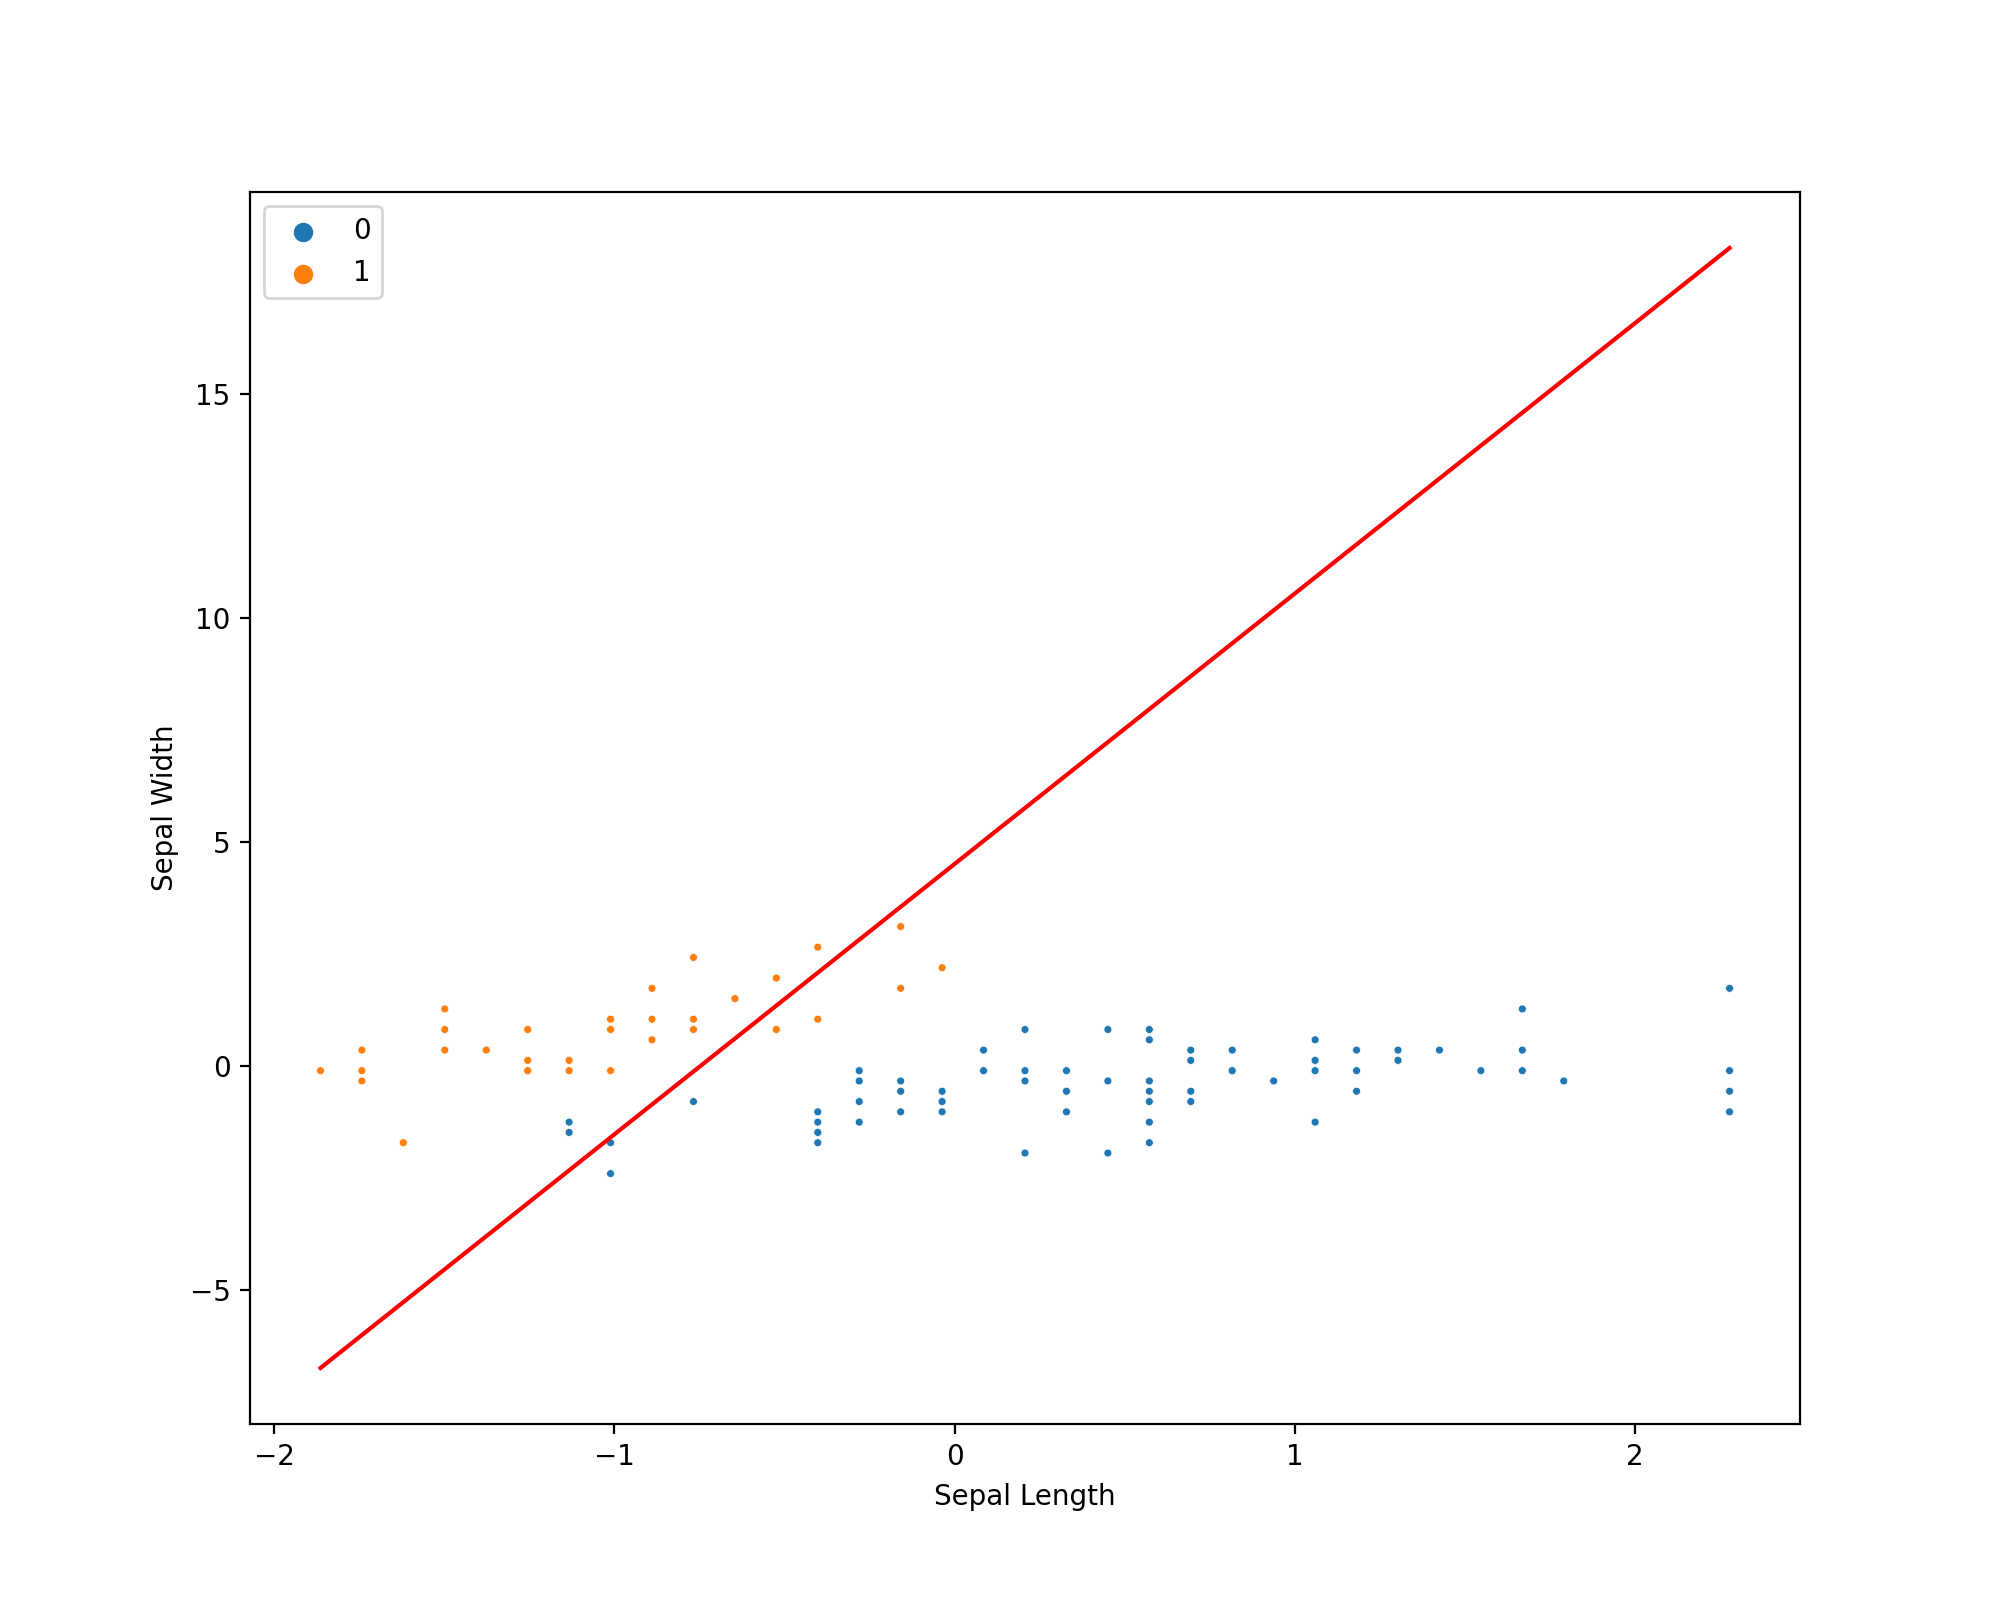

In [321]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train[:, 0],
                y=X_train[:, 1],
                hue=y_train,
                s=8)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

svc_model.fit(X_train, y_train)


x0_min = X_train[:, 0].min()
x0_max = X_train[:, 0].max()
x0_points = np.linspace(x0_min, x0_max, 100)


x1_min = X_train[:, 1].min()
x1_max = X_train[:, 1].max()
x1_points = np.linspace(x1_min, x1_max, 100)

x2_min = X_train[:, 2].min()
x2_max = X_train[:, 2].max()
x2_points = np.linspace(x2_min, x2_max, 100)

x3_min = X_train[:, 3].min()
x3_max = X_train[:, 3].max()
x3_points = np.linspace(x3_min, x3_max, 100)

w = svc_model.coef_[0]
b = svc_model.intercept_[0]
print(w)
print(b)



y_points = -((w[0] * x0_points) / w[1]) - ((w[2] * x2_points) / w[1]) - ((w[3] * x3_points) / w[1]) - (b / w[1])

plt.plot(x0_points, y_points, c='r')




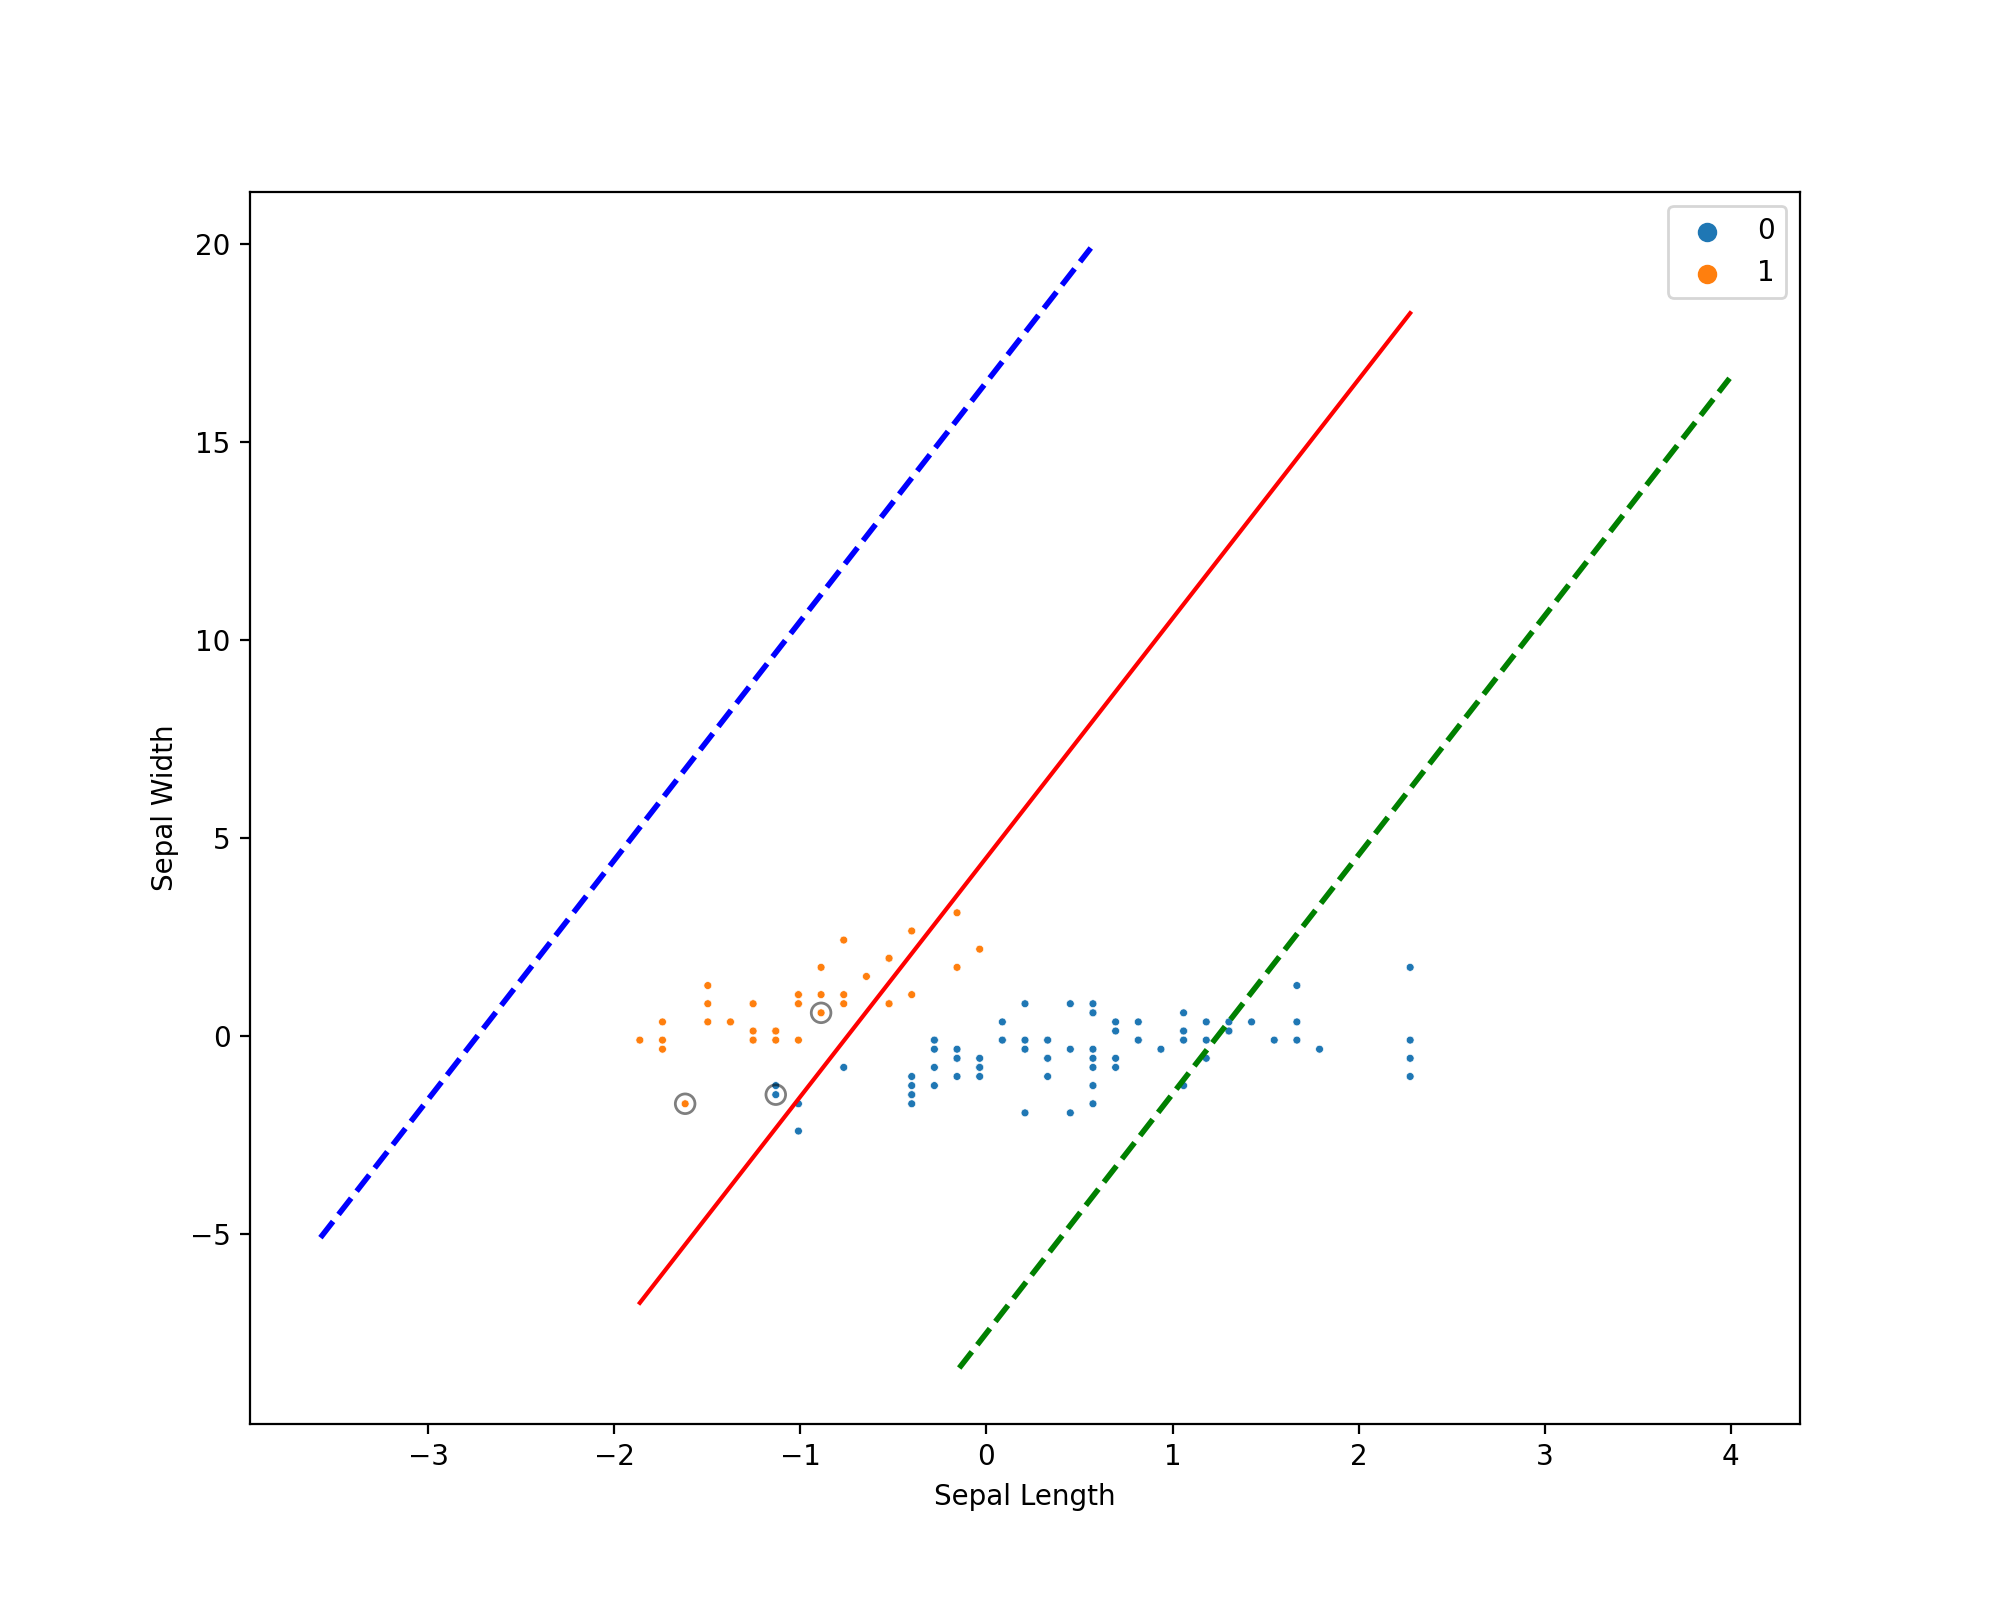

In [320]:

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train[:, 0],
                y=X_train[:, 1],
                hue=y_train,
                s=8)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

y_points = -((w[0] * x0_points) / w[1]) - ((w[2] * x2_points) / w[1]) - ((w[3] * x3_points) / w[1]) - (b / w[1])

plt.plot(x0_points, y_points, c='r')

plt.scatter(svc_model.support_vectors_[:, 0],
            svc_model.support_vectors_[:, 1],
            s=50,
            facecolors='none',
            edgecolors='k',
            alpha=.5);

w_hat = svc_model.coef_[0][:2] / (np.sqrt(np.sum(svc_model.coef_[0][:2] ** 2)))

margin = 1 / np.sqrt(np.sum(svc_model.coef_[0][:2] ** 2))

decision_boundary_points = np.array(list(zip(x0_points, y_points)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin


plt.plot(points_of_line_above[:, 0],
         points_of_line_above[:, 1],
         'b--',
         linewidth=2)


plt.plot(points_of_line_below[:, 0],
         points_of_line_below[:, 1],
         'g--',
         linewidth=2)





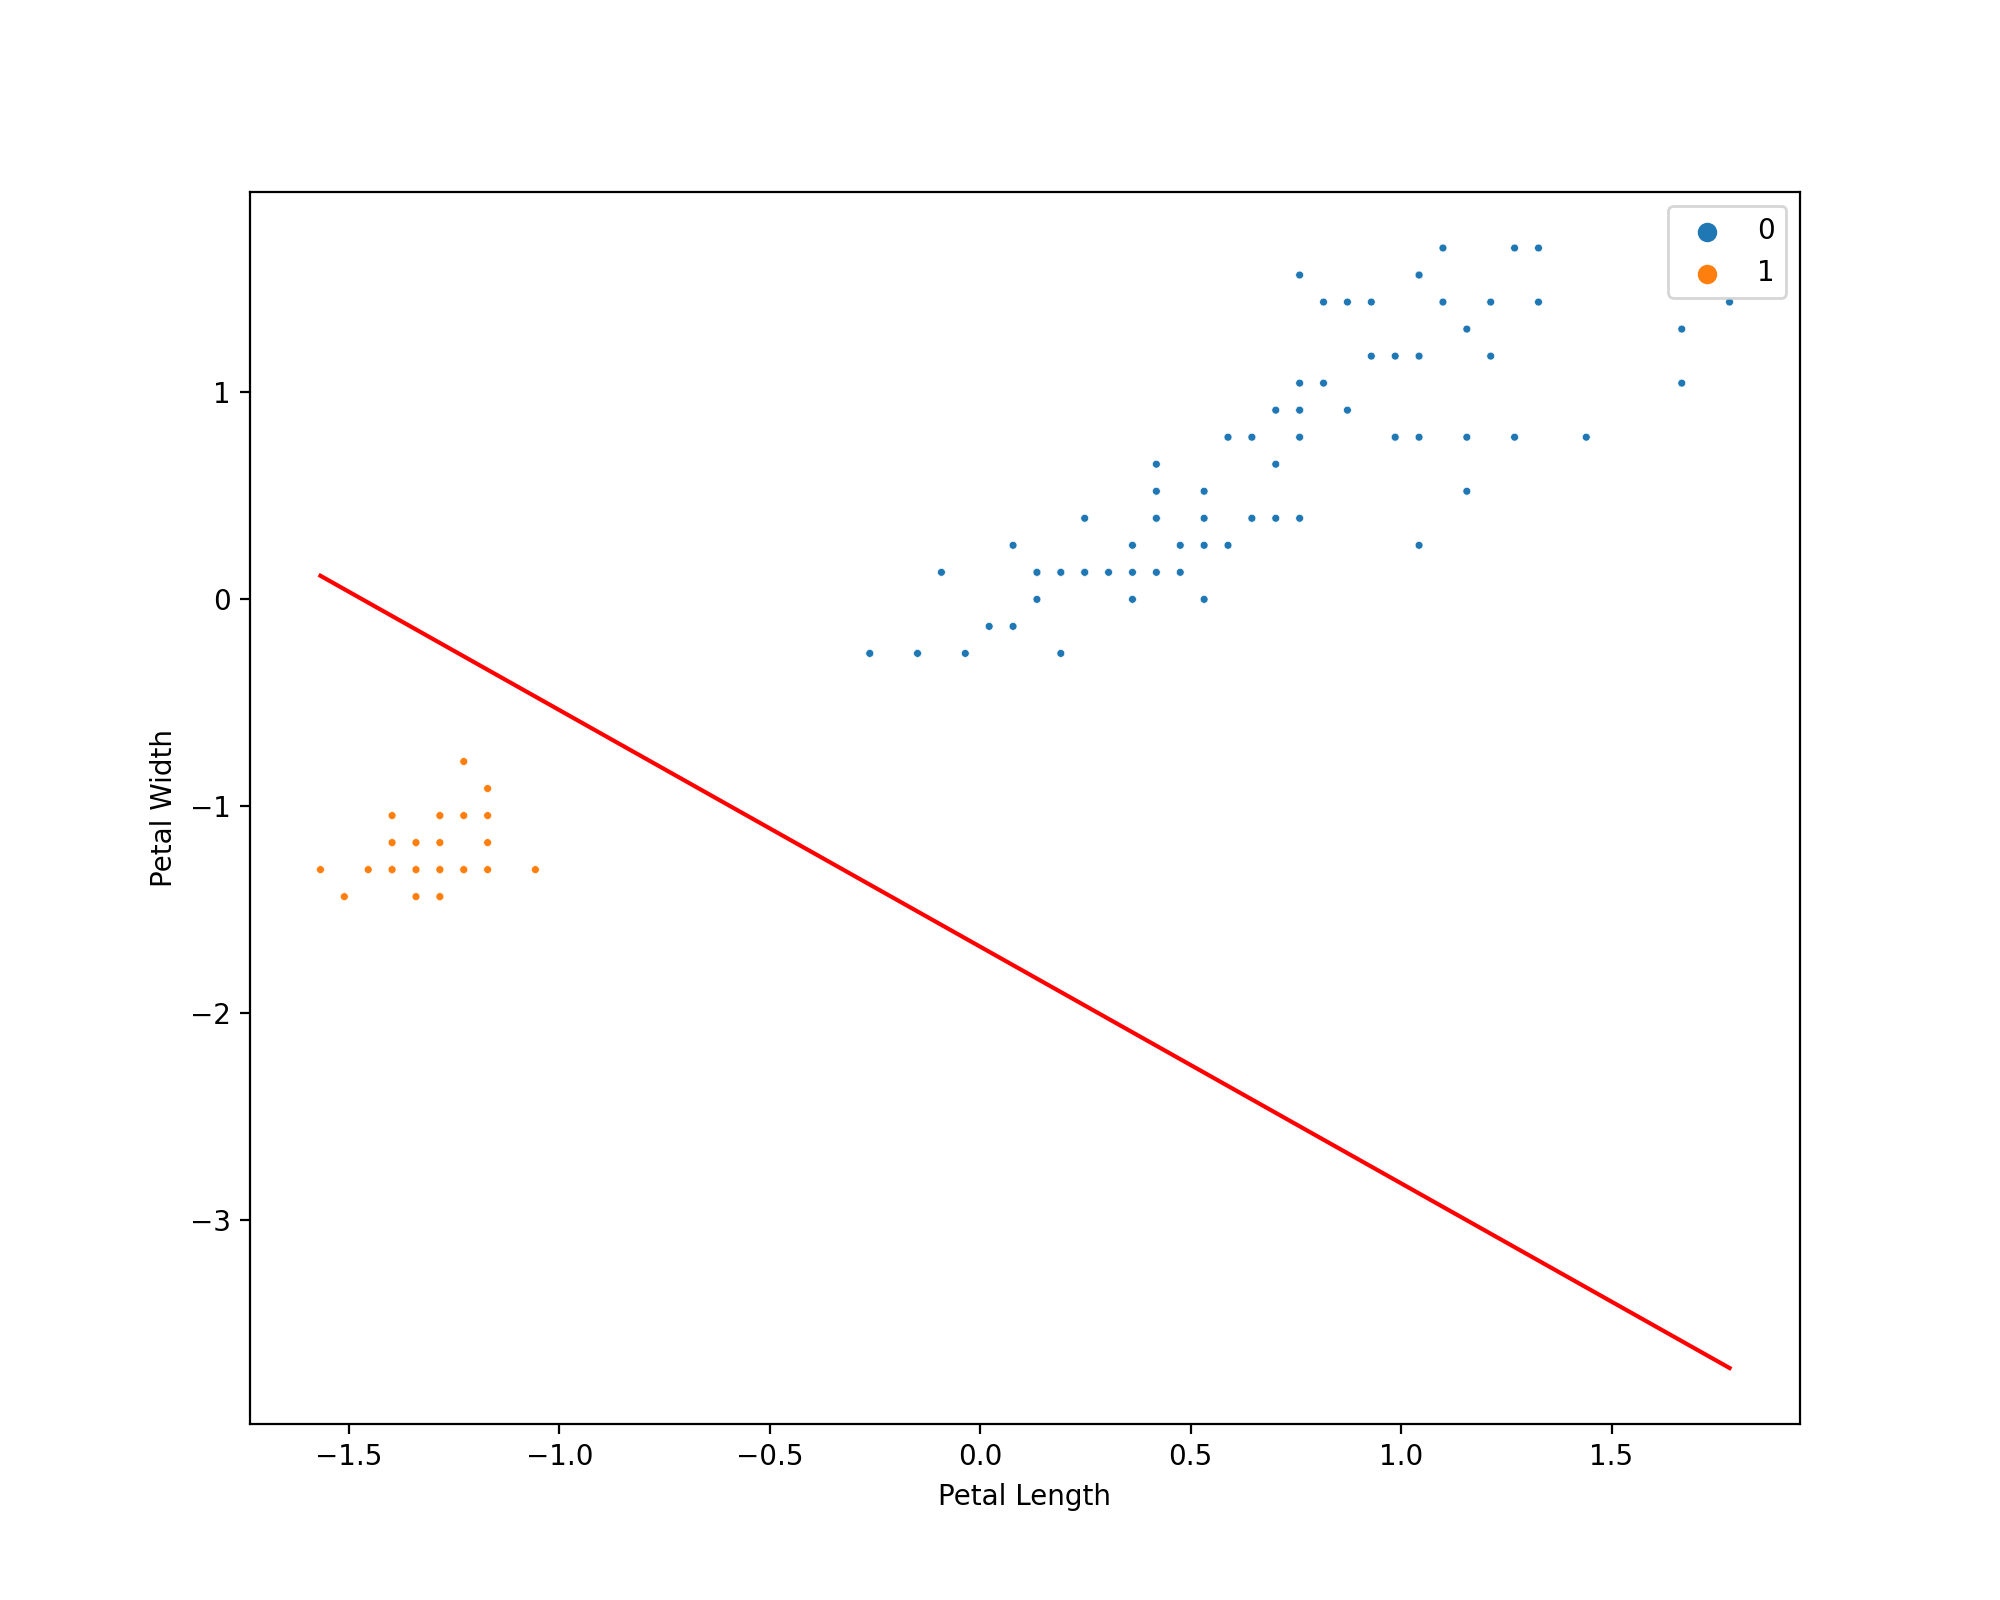

In [318]:

plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train[:, 2],
                y=X_train[:, 3],
                hue=y_train,
                s=8)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

y_points = -((w[0] * x0_points) / w[3]) - ((w[1] * x1_points) / w[3]) - ((w[2] * x2_points) / w[3]) - (b / w[3])

plt.plot(x2_points, y_points, c='r')


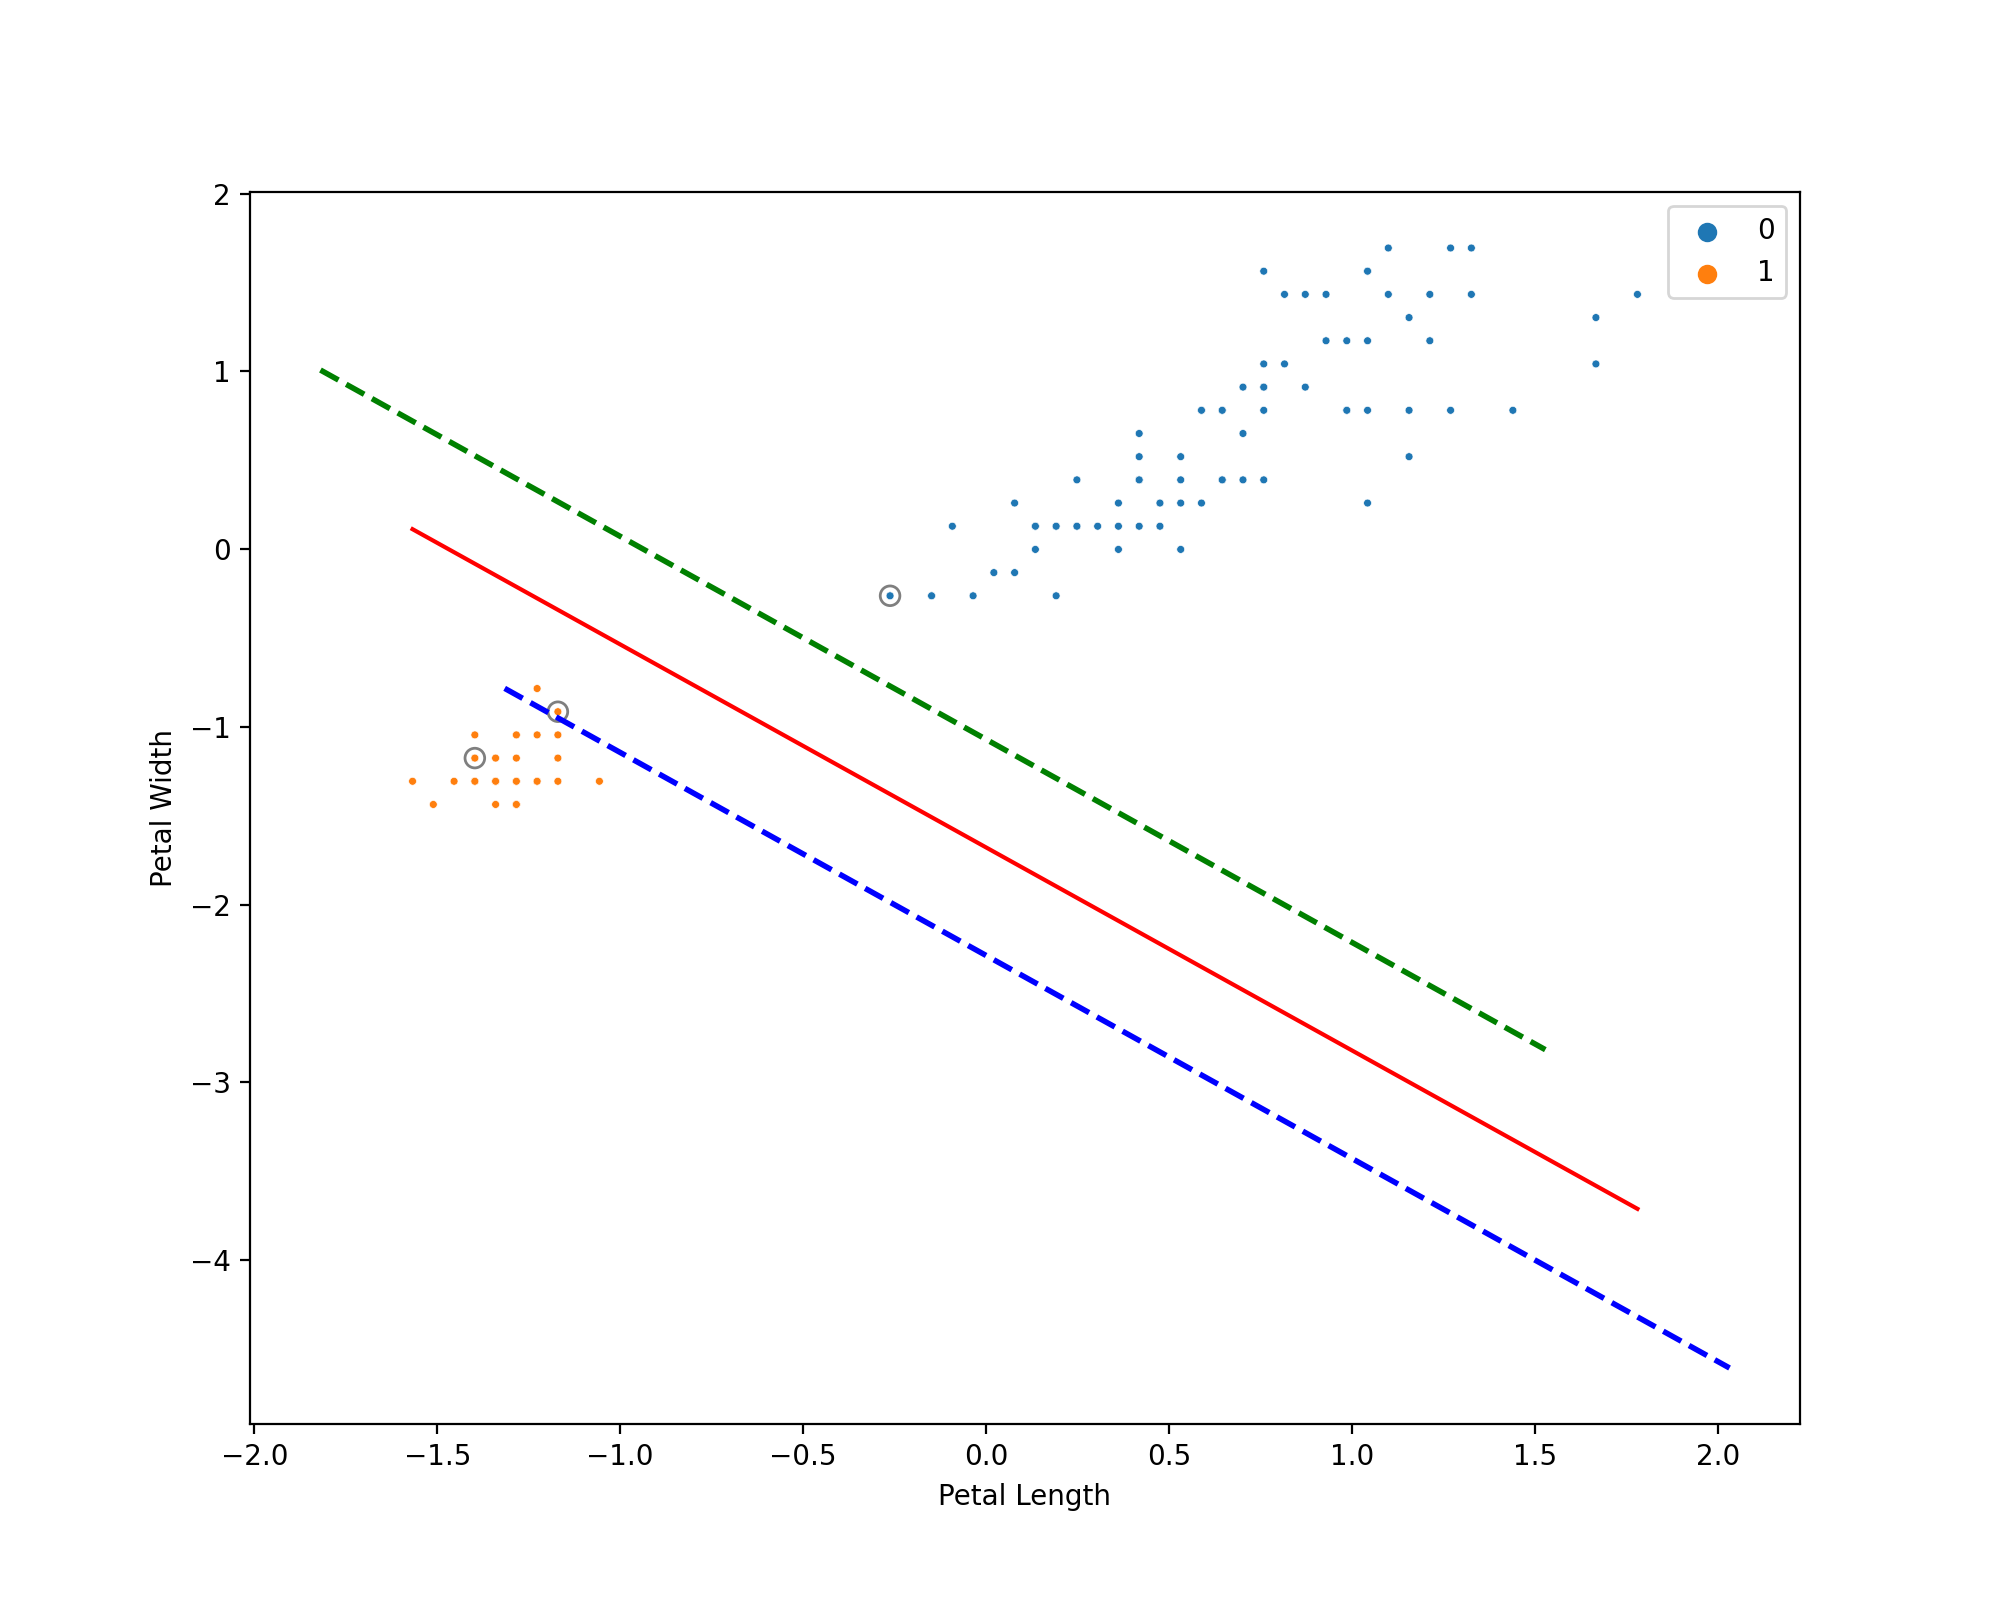

In [319]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train[:, 2],
                y=X_train[:, 3],
                hue=y_train,
                s=8)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

y_points = -((w[0] * x0_points) / w[3]) - ((w[1] * x1_points) / w[3]) - ((w[2] * x2_points) / w[3]) - (b / w[3])

plt.plot(x2_points, y_points, c='r')

plt.scatter(svc_model.support_vectors_[:, 2],
            svc_model.support_vectors_[:, 3],
            s=50,
            facecolors='none',
            edgecolors='k',
            alpha=.5);

w_hat = svc_model.coef_[0][1:3] / (np.sqrt(np.sum(svc_model.coef_[0][1:3] ** 2)))

margin = 1 / np.sqrt(np.sum(svc_model.coef_[0][1:3] ** 2))

decision_boundary_points = np.array(list(zip(x2_points, y_points)))
points_of_line_above = decision_boundary_points + w_hat * margin
points_of_line_below = decision_boundary_points - w_hat * margin

plt.plot(points_of_line_above[:, 0],
         points_of_line_above[:, 1],
         'b--',
         linewidth=2)
plt.plot(points_of_line_below[:, 0],
         points_of_line_below[:, 1],
         'g--',
         linewidth=2)